<font size=6><b>lec07. 불균형 데이터

<img src="./imgs/lec07.png">
* ref : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# Data Load

In [57]:
df = pd.read_csv("./datasets/creditcard.csv")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

## target Feature
* <font color=red size=4><b> 불균형

양성비율 : 0.172749
0    284315
1       492
Name: Class, dtype: int64


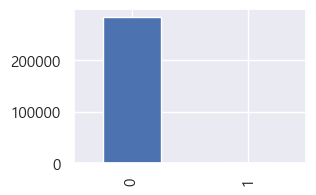

In [6]:
print( f"양성비율 : {len(df[df['Class']== 1]) / len(df) * 100 :2f}" )
print( df['Class'].value_counts() )
df['Class'].value_counts().plot(kind='bar', figsize=(3,2))
plt.show()



## 히스토그램

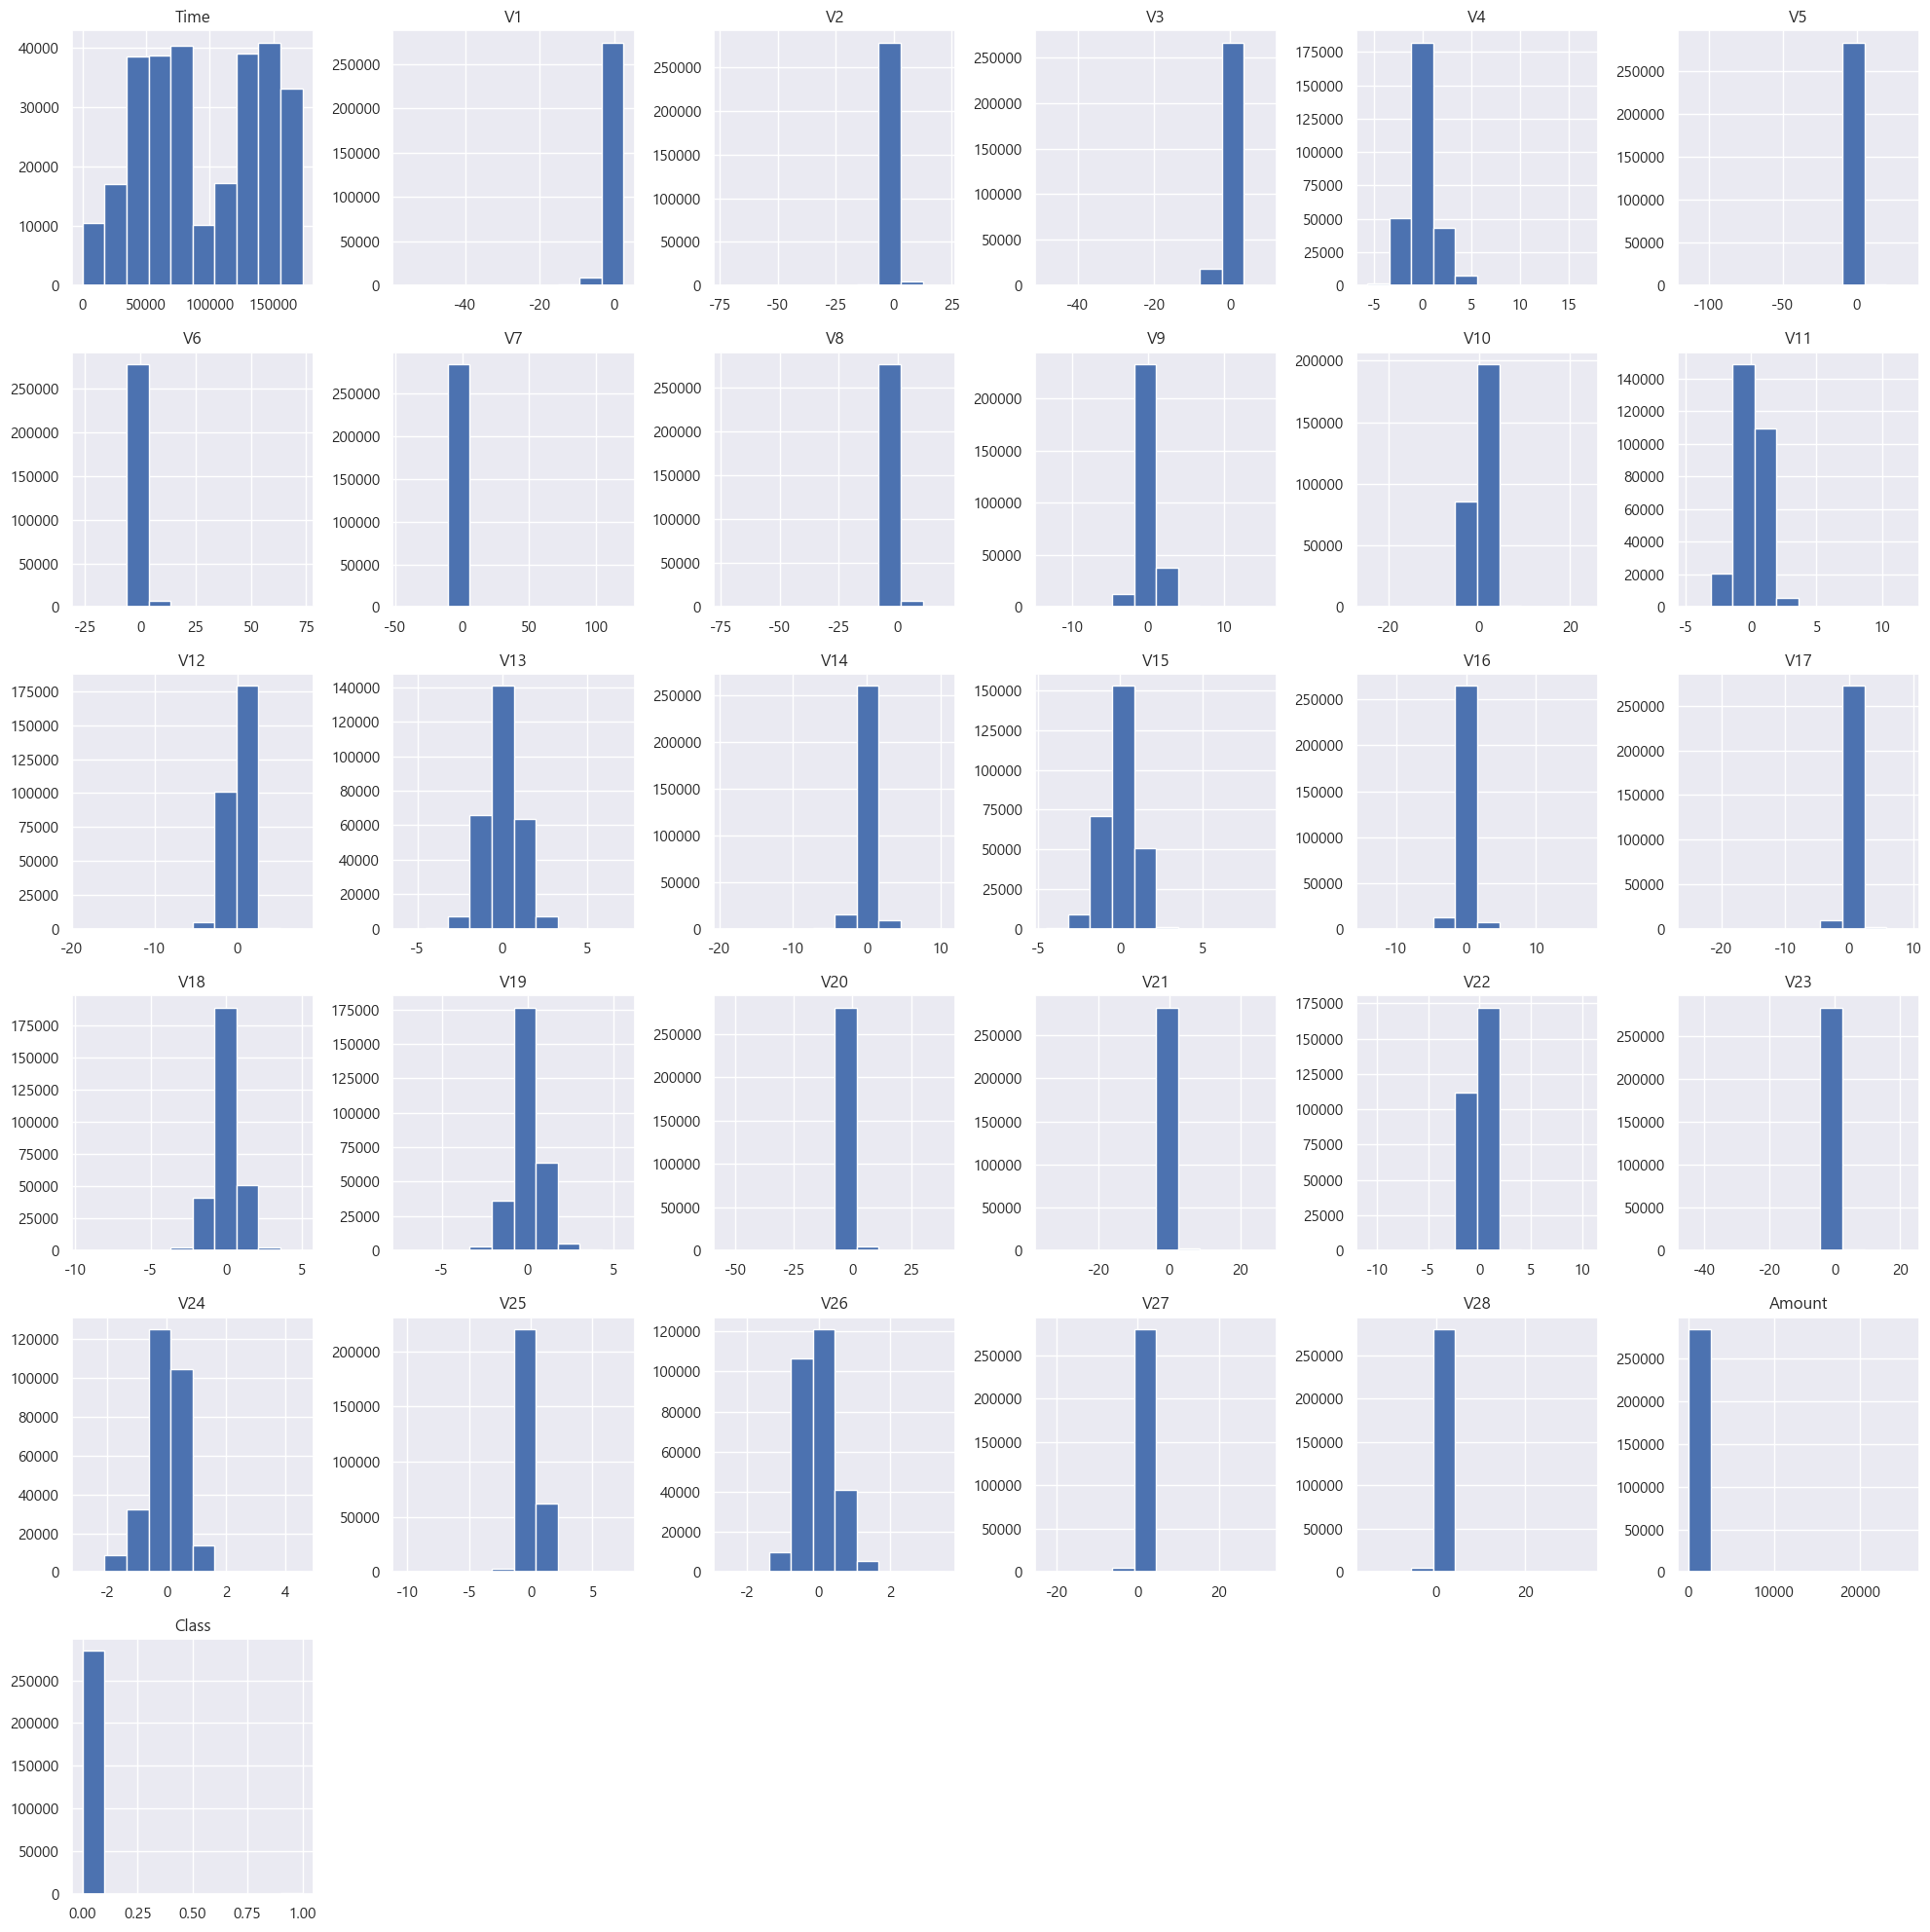

In [7]:
df.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

## Time, Amount, Class

<Figure size 300x200 with 0 Axes>

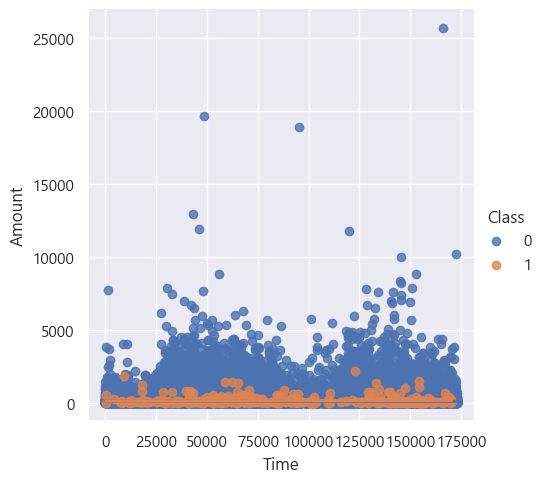

In [8]:
plt.figure(figsize=(3,2))
sns.lmplot(data=df, x="Time", y="Amount", hue="Class")
plt.show()

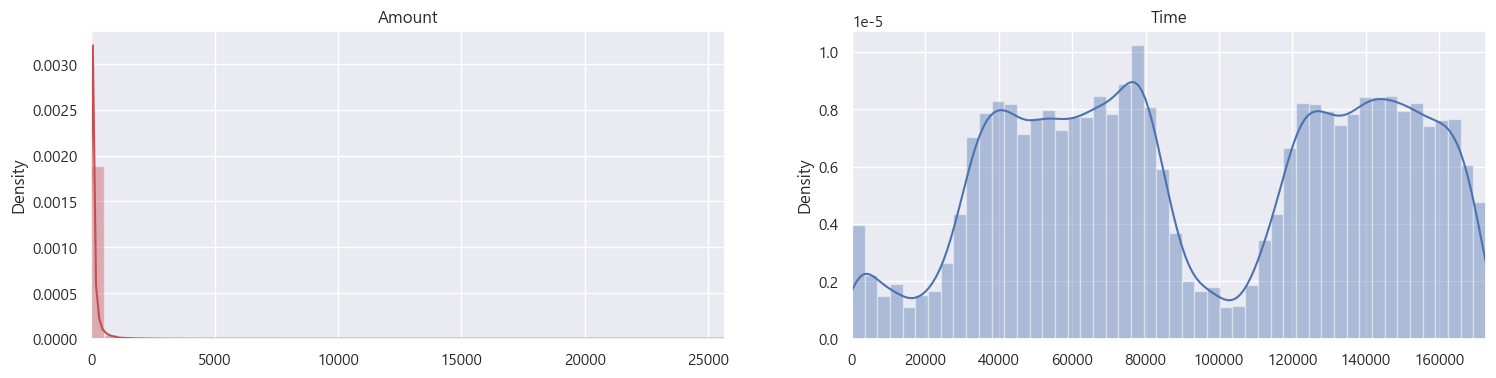

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## nunique()

In [11]:
# for col in df.columns:
#     print(col, df[col].value_counts())

In [12]:
for col in df.columns:
    print(col, df[col].nunique())

Time 124592
V1 275663
V2 275663
V3 275663
V4 275663
V5 275663
V6 275663
V7 275663
V8 275663
V9 275663
V10 275663
V11 275663
V12 275663
V13 275663
V14 275663
V15 275663
V16 275663
V17 275663
V18 275663
V19 275663
V20 275663
V21 275663
V22 275663
V23 275663
V24 275663
V25 275663
V26 275663
V27 275663
V28 275663
Amount 32767
Class 2


## 상관분석

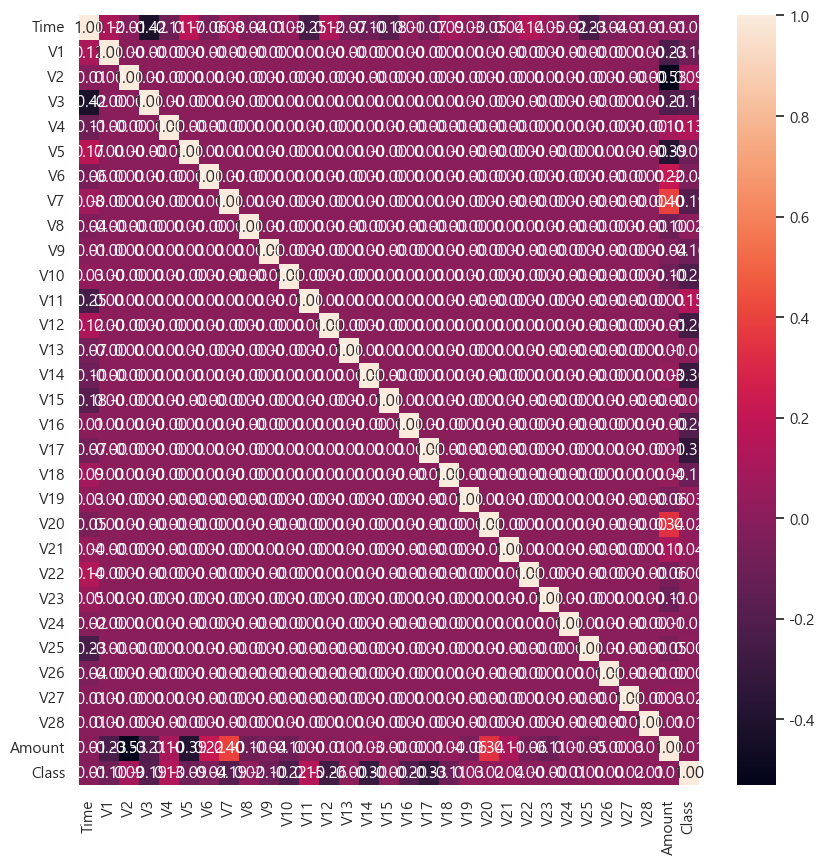

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), fmt=".2f", annot=True)
plt.show()

## Class 

In [14]:
large_col = df.corr().nlargest(6, 'Class').index.values
small_col = df.corr().nsmallest(5, 'Class').index.values
print(large_col, small_col)

['Class' 'V11' 'V4' 'V2' 'V21' 'V19'] ['V17' 'V14' 'V12' 'V10' 'V16']


In [15]:
large_col = ['Class' ,'V11', 'V4',  'V2',  'V21', 'V19'] 
small_col = ['Class' ,'V17' ,'V14', 'V12', 'V10' ,'V16']

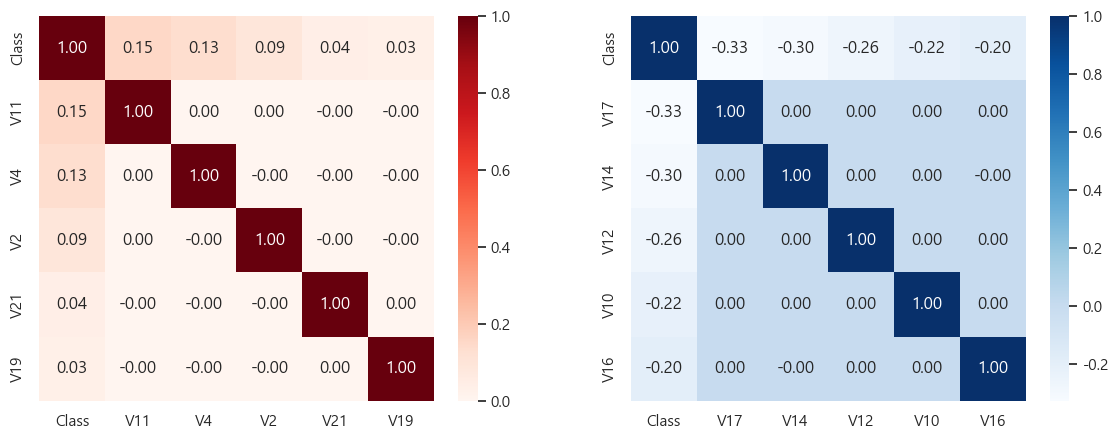

In [16]:
fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.heatmap(df[large_col].corr(), fmt=".2f", cmap="Reds",  annot=True, ax=axes[0])
sns.heatmap(df[small_col].corr(), fmt=".2f", cmap="Blues", annot=True, ax=axes[1])
plt.show()

## Amount

In [68]:
large_col = df.corr().nlargest(6, 'Amount').index.values
small_col = df.corr().nsmallest(5, 'Amount').index.values
print(large_col, small_col)

['Amount' 'V7' 'V20' 'V6' 'V21' 'V4'] ['V2' 'V5' 'V1' 'V3' 'V23']


In [69]:
large_col = ['Amount' ,'V7', 'V20', 'V6' ,'V21', 'V4']
small_col = ['Amount','V2', 'V5', 'V1', 'V3', 'V23']

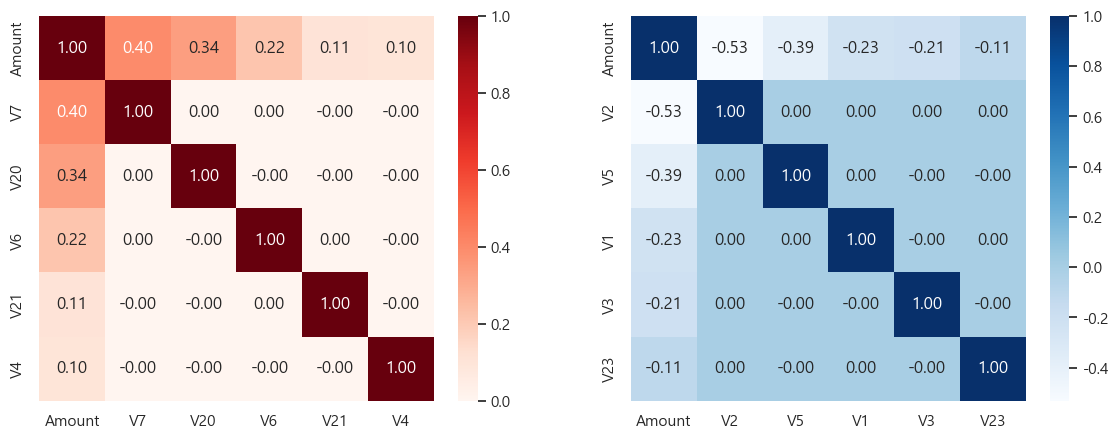

In [70]:
fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.heatmap(df[large_col].corr(), fmt=".2f", cmap="Reds",  annot=True, ax=axes[0])
sns.heatmap(df[small_col].corr(), fmt=".2f", cmap="Blues", annot=True, ax=axes[1])
plt.show()

## Time

In [71]:
large_col = df.corr().nlargest(6, 'Time').index.values
small_col = df.corr().nsmallest(5, 'Time').index.values
print(large_col, small_col)

['Time' 'V5' 'V22' 'V12' 'V1' 'V18'] ['V3' 'V11' 'V25' 'V15' 'V4']


In [72]:
large_col = ['Time', 'V5', 'V22', 'V12' ,'V1', 'V18']
small_col = ['Time','V3', 'V11' ,'V25' ,'V15', 'V4']

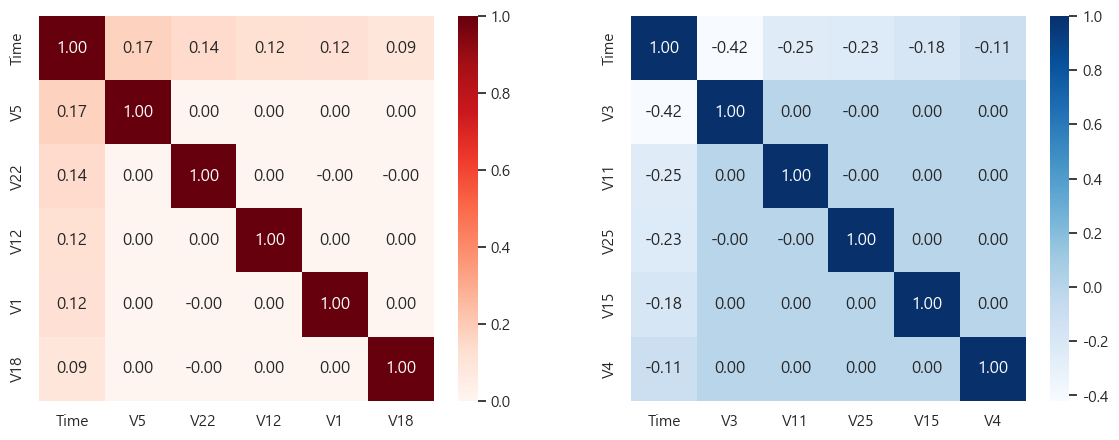

In [73]:
fig, axes = plt.subplots(1,2,figsize=(14,5))

sns.heatmap(df[large_col].corr(), fmt=".2f", cmap="Reds",  annot=True, ax=axes[0])
sns.heatmap(df[small_col].corr(), fmt=".2f", cmap="Blues", annot=True, ax=axes[1])
plt.show()

# 학습 & 평가

In [17]:
y = df['Class']
X = df.drop(['Class'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2)
model = DecisionTreeClassifier(random_state=11)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

[[56851    14]
 [   14    83]]
정확도: 0.9995, 정밀도: 0.8557, 재현율: 0.8557, F1: 0.8557


# 데이터 증강

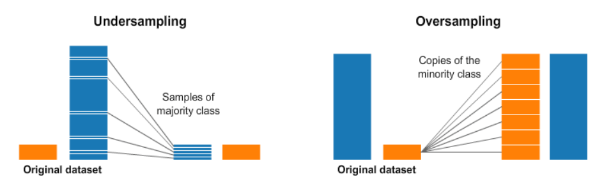

## Under Sampling
- undersampling :  높은 비중을 차지하는 클래스의 값을 제거해 낮은 비중의 클래스 값에 맞추는 기법
- 양성비율에 맞게 음성을 버림
- 시계열성 데이터는 shuffle 금지

In [51]:
cpdf=df.copy()

### sklearn.train_test_split()

### sklearn RandomUnderSampler
<pre>
class imblearn.under_sampling.RandomUnderSampler(*, sampling_strategy='auto', random_state=None, replacement=False)

In [54]:
y = cpdf['Class']
X = cpdf.drop(['Class'], axis=1)
from imblearn.under_sampling import RandomUnderSampler
X_s, y_s = RandomUnderSampler(sampling_strategy='auto', random_state=2021).fit_resample(X,y)
print(  len(X_s), len(y_s) )

y_s.value_counts()

984 984


0    492
1    492
Name: Class, dtype: int64

### df.sample
<pre>
DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

In [59]:
c1_size=df[df['Class']==1].shape[0]
c1_size

492

In [60]:
df0=cpdf[cpdf['Class']==0].sample(n=c1_size, random_state=21,ignore_index=True )
df1=cpdf[cpdf['Class']==1]
df0.shape,df1.shape

((492, 31), (492, 31))

In [61]:
df_under=pd.concat([df0,df1],ignore_index=True)
print(df_under.shape)
df_under['Class'].value_counts()

(984, 31)


0    492
1    492
Name: Class, dtype: int64

### 학습 & 평가
- under sampling 전 점수<br><br>
<pre>
[[56851    14]
[   14    83]]
정확도: 0.9995, 정밀도: 0.8557, 재현율: 0.8557, F1: 0.8557

In [66]:
y = df_under['Class']
X = df_under.drop(['Class'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2,random_state=21)
model = DecisionTreeClassifier(random_state=21)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

[[84  9]
 [10 94]]
정확도: 0.9036, 정밀도: 0.9126, 재현율: 0.9038, F1: 0.9082


## Over Sampling
- sklearn SMOTE
<pre>
class imblearn.over_sampling.SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)

- oversampling :  낮은 비중을 차지하는 클래스의 값을 더 많이 생성해 높은 비중의 클래스 값에 맞추는 기법
- 일반적으로 현업에서는 over sampling많이 사용
- KNN

In [65]:
from imblearn.over_sampling import SMOTE

y = cpdf['Class']
X = cpdf.drop(['Class'], axis=1)

X_s, y_s = SMOTE(sampling_strategy='auto', random_state=21).fit_resample(X,y)
print(  len(X_s), len(y_s) )

y_s.value_counts()

568630 568630


0    284315
1    284315
Name: Class, dtype: int64

### 학습 & 평가
- under sampling 전 점수<br><br>
<pre>
[[56851    14]
[   14    83]]
정확도: 0.9995, 정밀도: 0.8557, 재현율: 0.8557, F1: 0.8557

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X_s, y_s , test_size=0.2,random_state=21)
model = DecisionTreeClassifier(random_state=21)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")

[[56475   109]
 [   43 57099]]
정확도: 0.9987, 정밀도: 0.9981, 재현율: 0.9992, F1: 0.9987
